In [ ]:
!python -m pip install -U giotto-tda

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Scaler, Filtering, BettiCurve, PairwiseDistance
from gtda.pipeline import Pipeline

#DOSE

##EDA

In [ ]:
file_location = '/content/car-t.xlsx'
df = pd.read_excel(file_location)
df

,CAR-T cell infused Dose 106/kg,Age (Years),Sex,Malignancy,Response
0,0.400,66,M,CLL,SD
1,0.700,44,M,DLBCL,SD
2,2.400,55,M,CLL,PD
3,2.200,49,M,DLBCL,SD
4,1.000,44,F,CLL,CR
5,4.600,48,M,MCL,SD
6,0.700,48,M,CLL,PD
7,3.900,63,F,MCL,SD
8,2.200,57,M,MCL,PR
9,7.800,50,M,MCL,SD


In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Malignancy', 'Response'])
df.dtypes

CAR-T cell infused Dose 106/kg    float64
Age (Years)                         int64
Sex_F                               uint8
Sex_M                               uint8
Malignancy_ALL                      uint8
Malignancy_CLL                      uint8
Malignancy_DLBCL                    uint8
Malignancy_MCL                      uint8
Response_CR                         uint8
Response_NR                         uint8
Response_PD                         uint8
Response_PR                         uint8
Response_SD                         uint8
dtype: object

In [ ]:
df.describe()

,CAR-T cell infused Dose 106/kg,Age (Years),Sex_F,Sex_M,Malignancy_ALL,Malignancy_CLL,Malignancy_DLBCL,Malignancy_MCL,Response_CR,Response_NR,Response_PD,Response_PR,Response_SD
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,2.806037,33.370370,0.425926,0.574074,0.648148,0.148148,0.111111,0.092593,0.518519,0.055556,0.148148,0.074074,0.203704
std,3.182714,20.129108,0.499126,0.499126,0.482032,0.358583,0.317221,0.292582,0.504349,0.231212,0.358583,0.264351,0.406533
min,0.030000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.850000,48.750000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


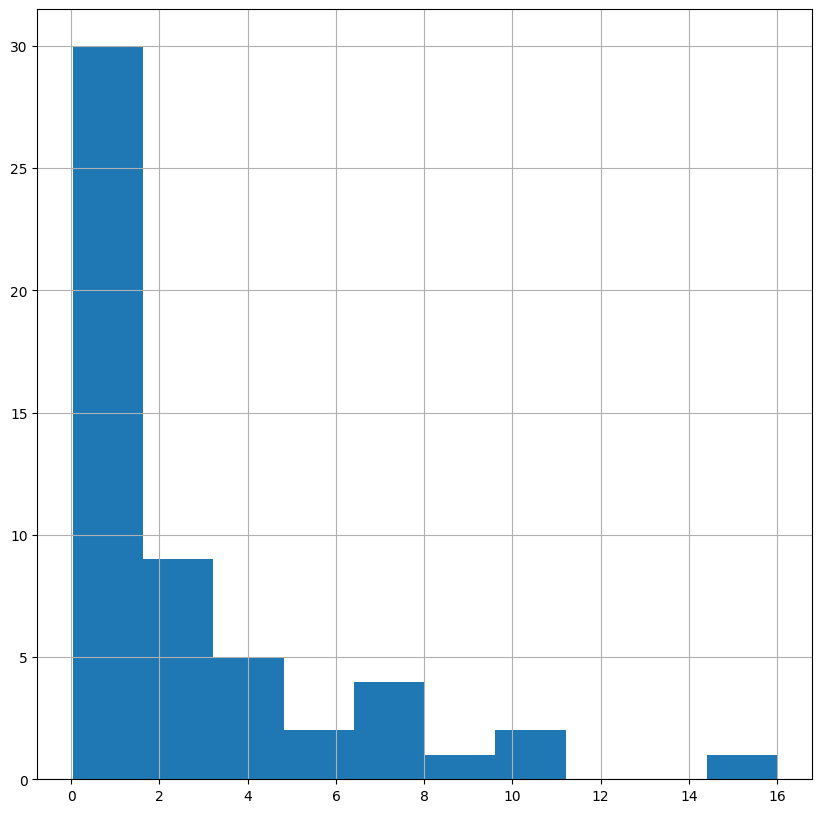

In [ ]:
_ = df['CAR-T cell infused Dose 106/kg'].hist(figsize=(10, 10), bins=10)

##PERSISTENT HOMOLOGY

In [ ]:
""" Connectivity information
0-dimensional homology β0 or H0, measures clusters;
1-dimensional homology1 β1 or H1, measures loops; and
2- dimensional homology β2 or H2, measures voids (empty spaces) """
homology_dimensions = [0, 1, 2]
VR = VietorisRipsPersistence(
                    homology_dimensions=homology_dimensions,
                    coeff=3,
                    n_jobs=-1
)
#plot persistence diagram
diagram =VR.fit_transform(np.array(df)[None, : , :])
VR.fit_transform_plot(np.array(df).reshape(1,*np.array(df).shape))
#scale the persistence diagram
diagramScaler = Scaler()
scaled = diagramScaler.fit_transform(diagram)
diagramScaler.plot(scaled, sample=0)
# persistence entropy
persistence_entropy = PersistenceEntropy()
# calculate topological feature matrix
feat_matrix = persistence_entropy.fit_transform(diagram)# expect shape - (n_point_clouds, n_homology_dims)feat_matrix.shape
#Plot a sample from a collection of Betti curves
BC = BettiCurve()
y_betti_curves = BC.fit_transform(diagram)
BC.plot(y_betti_curves)


In [ ]:
Y = df['Response_CR'].values
features = df.columns.values
X = df.loc[:, 'CAR-T cell infused Dose 106/kg':'Malignancy_MCL'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=666)
# binarize y_train, y_test for creating labels
label_train = pd.cut(y_train, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
label_test = pd.cut(y_test, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
#PIPELINE 1. Binary classification
steps = [
("persistence", VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0, 1, 2], n_jobs=-1)),
("entropy", PersistenceEntropy()),
("model", RandomForestClassifier(n_estimators=500)
)]
pipeline1 = Pipeline(steps, verbose=False)


In [ ]:
pipeline1["model"].fit(np.array(X_train), np.array(label_train))
y_pred1 = pipeline1["model"].predict(np.array(X_test))
test_mse1 = accuracy_score(np.array(label_test), y_pred1)
print(f'Classification Accuracy Score  using topological data = {test_mse1*100:.1f} %')


Classification Accuracy Score  using topological data = 57.1 %


In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,label_train)
y_std_pred = rf.predict(X_test)
test_mse_std = mean_squared_error(label_test, y_std_pred)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')

Classification Accuracy Score using a standard sklearn.ensemble algorithm = 42.9 %


##MAPPER

In [ ]:
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy
from sklearn.cluster import DBSCAN

In [ ]:
!pip uninstall umap
!pip install umap-learn

In [ ]:
import umap.umap_ as umap
import plotly.express as px
features = df.loc[:, 'Response_CR':'Response_SD']
n_neighbors=10
min_dist=0.5
umap_2d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=2,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
umap_3d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=3,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
proj_2d = umap_2d.fit_transform(df.drop(columns='Response_CR'))
proj_3d = umap_3d.fit_transform(df.drop(columns='Response_CR'))
fig_2d = px.scatter( proj_2d, x=0, y=1,
                   color=df['Response_CR'],
                   labels={'color': 'Response_CR'}
)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,
                      color=df['Response_CR'],
                      labels={'color': 'Response_CR'}
)
fig_2d.update_layout(title='UMAP projection 2D and 3D')
fig_3d.update_traces(marker_size=5)
fig_2d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_3d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_2d.show()
fig_3d.show()

In [ ]:
#build a pipeline for mapper algorithm
make_mapper_pipeline()

MapperPipeline(steps=[('pullback_cover',
                       ListFeatureUnion(transformer_list=[('clustering_preprocessing',
                                                           FunctionTransformer(validate=True)),
                                                          ('map_and_cover',
                                                           Pipeline(steps=[('scaler',
                                                                            FunctionTransformer()),
                                                                           ('filter_func',
                                                                            PCA(n_components=2)),
                                                                           ('cover',
                                                                            CubicalCover())]))])),
                      ('clustering', ParallelClustering(clusterer=DBSCAN())),
                      ('nerve', Nerve())])

In [ ]:
""" 1. Define filter function – can be any scikit-learn transformer.It is returning a selection of columns of the data """
filter_func = Eccentricity(metric= 'euclidean') #Eccentricities of points in a point cloud or abstract metric space.
""" 2. Define cover """
cover = CubicalCover(n_intervals=30, overlap_frac=0.3)
""" 3. Choose clustering algorithm – default is DBSCAN """
clusterer = DBSCAN(eps=8, min_samples=3, metric='euclidean')
""" 4. Initialise pipeline """
pipe_mapper = make_mapper_pipeline(
filter_func=filter_func, cover=cover, clusterer=clusterer, verbose=False, n_jobs=-1
)

In [ ]:
data = df.drop(['Response_CR', 'Response_NR', 'Response_PD', 'Response_PR', 'Response_SD'], axis=1)


In [ ]:
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics

In [ ]:
#data = df.drop(columns='Response _CR', 'Response _NR', 'Response _PD', 'Response _PR', 'Response _SD')
#Check the cluster performance
db = clusterer.fit(data)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
"""The best value of Silhouette score is 1, and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."""
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(proj_3d, labels))

Estimated number of clusters: 1
Estimated number of noise points: 2
Silhouette Coefficient: 0.083


In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(
    pipe_mapper, data, layout='fruchterman_reingold', node_scale =20, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

##RTD-AE

In [ ]:
!pip install git+https://github.com/simonzhang00/ripser-plusplus.git
!pip install git+https://github.com/IlyaTrofimov/RTD.git

In [ ]:
file_location = '/content/Dose-CR.xlsx'
D = pd.read_excel(file_location)

file_location = '/content/Dose-not CR.xlsx'
P = pd.read_excel(file_location)

In [ ]:
D = pd.get_dummies(D, columns=['Sex', 'Malignancy'])
P = pd.get_dummies(P, columns=['Sex', 'Malignancy'])

In [ ]:
D = D.to_numpy()
P = P.to_numpy()

H0: num barcodes 0
H1: num barcodes 18
max0,976Barcode 1 = 0.2509201541543007
maxBarcode 1 = 0.2509201541543007
middleBarcode 1 = 0.07500283792614937


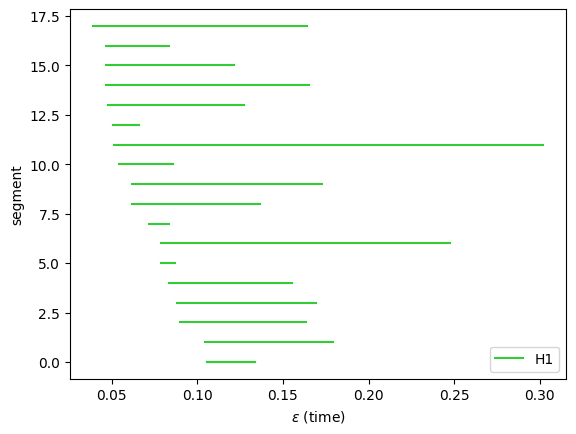

In [ ]:
import numpy as np
import rtd

barc = rtd.calc_embed_dist(D, P)
rtd.plot_barcodes(rtd.barc2array(barc))

In [ ]:
rtd.rtd(D, P)

1.4555941596627235

#CRS

##EDA

In [ ]:
file_location = '/content/Cytokine value df.xlsx'
df = pd.read_excel(file_location)
df

,IL12,IL13,sIL2Ra,MCP1,EGF,IL2,IL4,IL5,IL6,IL7,...,TNFα,IFNα,IFNγ,MIP1α,MIP1β,MIG,GCSF,GM-CSF,IP10,Cohort
0,182.42750,24.970140,400.8503,275.8078,0.854815,0.907477,3.270133,0.750665,1.941431,0.430000,...,0.929632,23.121176,16.403387,33.128975,64.025266,18.428037,106.427432,1.080000,27.360648,donor
1,175.99310,19.840840,302.4528,458.3879,2.382829,0.680001,6.232565,1.324947,0.509458,0.430000,...,0.884284,25.970493,27.339065,30.621346,32.617469,24.125312,121.904522,1.080000,10.300110,donor
2,183.09880,21.569350,196.8770,272.0327,1.223958,1.529597,3.270000,0.350205,5.812509,0.430000,...,1.098946,28.306708,28.098796,34.967570,86.435970,18.783876,121.778080,1.080000,10.300000,donor
3,185.35340,47.447040,232.6403,273.9509,0.818926,0.680000,6.973260,1.425078,0.320672,0.430000,...,1.348690,27.028590,19.312399,31.521769,36.134597,11.189689,121.957166,1.080000,18.703015,donor
4,184.68060,20.635290,349.7027,324.8034,2.152849,0.870156,3.270000,0.686822,5.661574,0.430000,...,1.775537,21.389670,16.463971,33.869785,31.484982,14.466521,83.374166,1.080000,20.728640,donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.27462,16.223622,894.6172,2962.8748,22.580170,0.474100,2.972994,0.040000,1.440060,0.120000,...,1.117743,34.520618,7.374489,15.074467,56.898086,76.820826,49.556029,4.356994,69.061528,patient
96,80.81106,12.452503,1223.6472,1531.8160,0.280988,1.651251,1.090014,0.271123,19.370359,0.177402,...,0.081020,56.654734,6.725498,8.216245,50.097287,53.150908,58.336081,0.070000,54.339771,patient
97,88.76597,9.370840,1953.7223,1781.2591,16.168998,1.837974,1.090061,0.040001,18.915645,0.120000,...,0.374523,24.888182,2.873712,22.120834,57.474933,40.991198,67.199896,0.101935,70.478536,patient
98,81.81452,27.811568,1478.6799,2358.7791,1.852709,0.050111,1.103454,8.241436,3.976316,0.135321,...,0.049185,45.881365,1.136595,14.438872,58.573593,27.504291,50.710854,0.070000,57.539198,patient


In [ ]:
df = pd.get_dummies(df, columns=['Cohort'])
df.dtypes

IL12              float64
IL13              float64
sIL2Ra            float64
MCP1              float64
EGF               float64
IL2               float64
IL4               float64
IL5               float64
IL6               float64
IL7               float64
IL8               float64
IL10              float64
IL15              float64
IL17              float64
IL1RA             float64
sIL1RI            float64
sIL1RII           float64
sIL4R             float64
sIL6R             float64
sgp130            float64
TNFα              float64
IFNα              float64
IFNγ              float64
MIP1α             float64
MIP1β             float64
MIG               float64
GCSF              float64
GM-CSF            float64
IP10              float64
Cohort_donor        uint8
Cohort_patient      uint8
dtype: object

In [ ]:
df.describe()

,IL12,IL13,sIL2Ra,MCP1,EGF,IL2,IL4,IL5,IL6,IL7,...,IFNα,IFNγ,MIP1α,MIP1β,MIG,GCSF,GM-CSF,IP10,Cohort_donor,Cohort_patient
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,138.157803,25.794318,856.955351,1061.241336,3.664722,1.048407,4.888378,0.829330,4.761500,0.773918,...,29.787347,12.290400,27.348070,55.875121,28.900193,81.074594,1.812427,42.973895,0.500000,0.500000
std,47.011751,14.138935,605.270291,1045.114847,6.094798,1.268457,7.734686,1.833842,8.296316,1.868732,...,9.729290,8.862944,10.614455,15.708372,16.557625,25.810016,8.781622,25.445782,0.502519,0.502519
min,72.589230,1.864044,196.877000,272.032700,0.280141,0.050000,1.090000,0.040000,0.290000,0.120000,...,16.758894,0.106545,8.216245,30.769246,9.296301,33.683487,0.070000,10.300000,0.000000,0.000000
25%,92.273663,13.757047,306.347050,308.694150,0.818666,0.680000,1.118763,0.040062,0.318048,0.131149,...,22.647960,3.335905,19.245805,43.617815,15.998906,58.330594,0.070000,20.044447,0.000000,0.000000
50%,150.964080,24.327979,655.529350,540.488250,1.263223,0.682545,3.270064,0.350571,1.531547,0.430000,...,26.744973,15.387808,29.007693,55.617434,22.119714,83.430412,1.080000,41.069885,0.500000,0.500000
75%,183.565525,39.630225,1338.794250,1539.931925,3.814834,1.522014,5.239918,0.612819,5.573723,0.430000,...,34.405040,18.171117,33.103437,66.671368,38.115784,98.134207,1.080000,66.629167,1.000000,1.000000
max,196.627100,47.599930,2294.158900,4453.393900,41.140707,8.706432,62.725392,14.342634,63.224583,13.089858,...,71.107105,28.098796,67.500961,90.363126,77.429357,121.999767,85.172697,84.097190,1.000000,1.000000


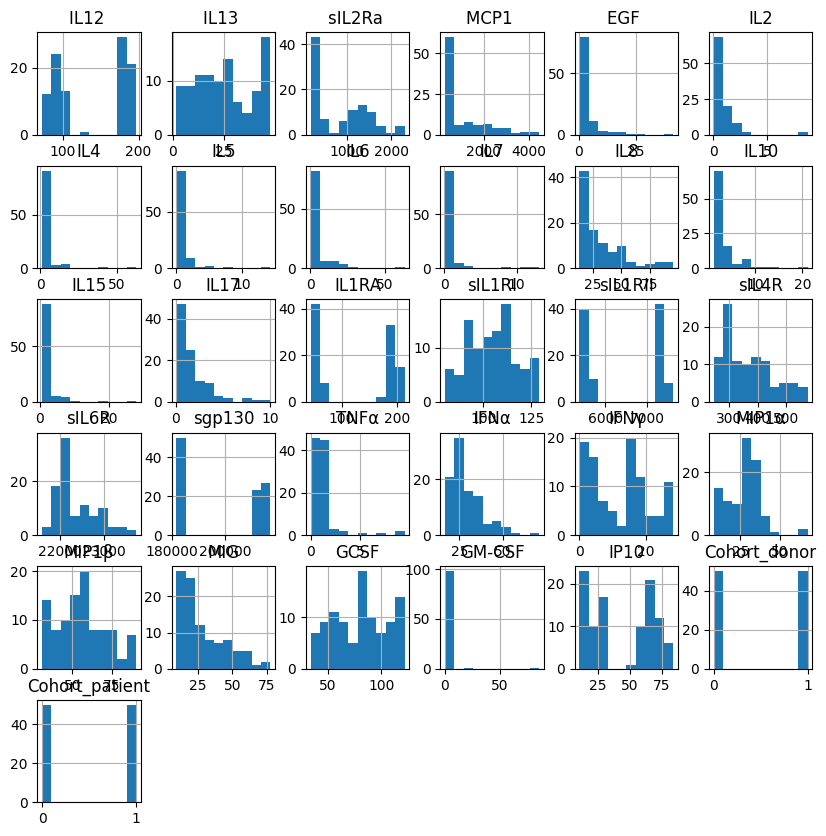

In [ ]:
_ = df.hist(figsize=(10, 10), bins=10)

##PERSISTENT HOMOLOGY

In [ ]:
""" Connectivity information
0-dimensional homology β0 or H0, measures clusters;
1-dimensional homology1 β1 or H1, measures loops; and
2- dimensional homology β2 or H2, measures voids (empty spaces) """
homology_dimensions = [0, 1, 2]
VR = VietorisRipsPersistence(
                    homology_dimensions=homology_dimensions,
                    coeff=3,
                    n_jobs=-1
)
#plot persistence diagram
diagram =VR.fit_transform(np.array(df)[None, : , :])
VR.fit_transform_plot(np.array(df).reshape(1,*np.array(df).shape))
#scale the persistence diagram
diagramScaler = Scaler()
scaled = diagramScaler.fit_transform(diagram)
diagramScaler.plot(scaled, sample=0)
# persistence entropy
persistence_entropy = PersistenceEntropy()
# calculate topological feature matrix
feat_matrix = persistence_entropy.fit_transform(diagram)# expect shape - (n_point_clouds, n_homology_dims)feat_matrix.shape
#Plot a sample from a collection of Betti curves
BC = BettiCurve()
y_betti_curves = BC.fit_transform(diagram)
BC.plot(y_betti_curves)


In [ ]:
Y = df['Cohort_patient'].values
features = df.columns.values
X = df.loc[:, 'IL12 ':'IP10'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=666)
# binarize y_train, y_test for creating labels
label_train = pd.cut(y_train, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
label_test = pd.cut(y_test, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
#PIPELINE 1. Binary classification
steps = [
("persistence", VietorisRipsPersistence(metric="euclidean", homology_dimensions=[0, 1, 2], n_jobs=-1)),
("entropy", PersistenceEntropy()),
("model", RandomForestClassifier(n_estimators=500)
)]
pipeline1 = Pipeline(steps, verbose=False)


In [ ]:
pipeline1["model"].fit(np.array(X_train), np.array(label_train))
y_pred1 = pipeline1["model"].predict(np.array(X_test))
test_mse1 = accuracy_score(np.array(label_test), y_pred1)
print(f'Classification Accuracy Score  using topological data = {test_mse1*100:.1f} %')


Classification Accuracy Score  using topological data = 100.0 %


In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,label_train)
y_std_pred = rf.predict(X_test)
test_mse_std = accuracy_score(label_test, y_std_pred)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')

Classification Accuracy Score using a standard sklearn.ensemble algorithm = 100.0 %


##MAPPER

In [ ]:
file_location = '/content/Cytokine value df.xlsx'
df = pd.read_excel(file_location)

In [ ]:
import umap.umap_ as umap
import plotly.express as px
features = df.loc[:, 'Cohort']
n_neighbors=10
min_dist=0.5
umap_2d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=2,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
umap_3d = umap.UMAP(n_neighbors=n_neighbors,
                    n_components=3,
                    min_dist=min_dist,
                    init='random',
                    random_state=0)
proj_2d = umap_2d.fit_transform(df.drop(columns='Cohort'))
proj_3d = umap_3d.fit_transform(df.drop(columns='Cohort'))
fig_2d = px.scatter( proj_2d, x=0, y=1,
                   color=df['Cohort'],
                   labels={'color': 'Cohort'}
)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,
                      color=df['Cohort'],
                      labels={'color': 'Cohort'}
)
fig_2d.update_layout(title='UMAP projection 2D and 3D')
fig_3d.update_traces(marker_size=5)
fig_2d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_3d.update_layout({'plot_bgcolor': 'aliceblue' , 'paper_bgcolor': 'white',}, template='plotly_white')
fig_2d.show()
fig_3d.show()

In [ ]:
#build a pipeline for mapper algorithm
make_mapper_pipeline()

MapperPipeline(steps=[('pullback_cover',
                       ListFeatureUnion(transformer_list=[('clustering_preprocessing',
                                                           FunctionTransformer(validate=True)),
                                                          ('map_and_cover',
                                                           Pipeline(steps=[('scaler',
                                                                            FunctionTransformer()),
                                                                           ('filter_func',
                                                                            PCA(n_components=2)),
                                                                           ('cover',
                                                                            CubicalCover())]))])),
                      ('clustering', ParallelClustering(clusterer=DBSCAN())),
                      ('nerve', Nerve())])

In [ ]:
""" 1. Define filter function – can be any scikit-learn transformer.It is returning a selection of columns of the data """
filter_func = Eccentricity(metric= 'euclidean') #Eccentricities of points in a point cloud or abstract metric space.
""" 2. Define cover """
cover = CubicalCover(n_intervals=30, overlap_frac=0.3)
""" 3. Choose clustering algorithm – default is DBSCAN """
clusterer = DBSCAN(eps=8, min_samples=3, metric='euclidean')
""" 4. Initialise pipeline """
pipe_mapper = make_mapper_pipeline(
filter_func=filter_func, cover=cover, clusterer=clusterer, verbose=False, n_jobs=-1
)

In [ ]:
data = df.drop(['Cohort'], axis=1)


In [ ]:
#data = df.drop(columns='Response _CR', 'Response _NR', 'Response _PD', 'Response _PR', 'Response _SD')
#Check the cluster performance
db = clusterer.fit(data)
labels = db.labels_
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ = 2
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
"""The best value of Silhouette score is 1, and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."""
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(proj_3d, labels))

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(
    pipe_mapper, data, layout='fruchterman_reingold', node_scale =20, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

##RTD-AE

In [ ]:
!pip install git+https://github.com/simonzhang00/ripser-plusplus.git
!pip install git+https://github.com/IlyaTrofimov/RTD.git

In [ ]:
file_location = '/content/Donors.xlsx'
D = pd.read_excel(file_location)

file_location = '/content/Patients.xlsx'
P = pd.read_excel(file_location)

In [ ]:
D = D.to_numpy()
P = P.to_numpy()

H0: num barcodes 16
max0,976Barcode 0 = 3.7879431147302967e-06
maxBarcode 0 = 3.7879431147302967e-06
middleBarcode 0 = 2.6784803139889846e-06
H1: num barcodes 45
max0,976Barcode 1 = 0.21215227246284485
maxBarcode 1 = 0.2584961950778961
middleBarcode 1 = 0.05514632165431976


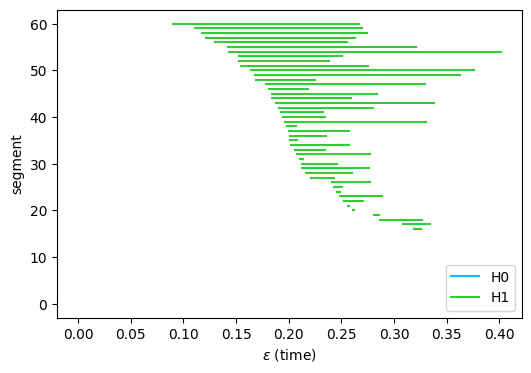

In [ ]:
import numpy as np
import rtd

barc = rtd.calc_embed_dist(D, P)
rtd.plot_barcodes(rtd.barc2array(barc))

In [ ]:
rtd.rtd(D, P)

3.7497145235538483

#ADDITION

In [ ]:
file_location = '/content/Cytokine value df.xlsx'
df = pd.read_excel(file_location)
df

,IL12,IL13,sIL2Ra,MCP1,EGF,IL2,IL4,IL5,IL6,IL7,...,TNFα,IFNα,IFNγ,MIP1α,MIP1β,MIG,GCSF,GM-CSF,IP10,Cohort
0,182.42750,24.970140,400.8503,275.8078,0.854815,0.907477,3.270133,0.750665,1.941431,0.430000,...,0.929632,23.121176,16.403387,33.128975,64.025266,18.428037,106.427432,1.080000,27.360648,donor
1,175.99310,19.840840,302.4528,458.3879,2.382829,0.680001,6.232565,1.324947,0.509458,0.430000,...,0.884284,25.970493,27.339065,30.621346,32.617469,24.125312,121.904522,1.080000,10.300110,donor
2,183.09880,21.569350,196.8770,272.0327,1.223958,1.529597,3.270000,0.350205,5.812509,0.430000,...,1.098946,28.306708,28.098796,34.967570,86.435970,18.783876,121.778080,1.080000,10.300000,donor
3,185.35340,47.447040,232.6403,273.9509,0.818926,0.680000,6.973260,1.425078,0.320672,0.430000,...,1.348690,27.028590,19.312399,31.521769,36.134597,11.189689,121.957166,1.080000,18.703015,donor
4,184.68060,20.635290,349.7027,324.8034,2.152849,0.870156,3.270000,0.686822,5.661574,0.430000,...,1.775537,21.389670,16.463971,33.869785,31.484982,14.466521,83.374166,1.080000,20.728640,donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.27462,16.223622,894.6172,2962.8748,22.580170,0.474100,2.972994,0.040000,1.440060,0.120000,...,1.117743,34.520618,7.374489,15.074467,56.898086,76.820826,49.556029,4.356994,69.061528,patient
96,80.81106,12.452503,1223.6472,1531.8160,0.280988,1.651251,1.090014,0.271123,19.370359,0.177402,...,0.081020,56.654734,6.725498,8.216245,50.097287,53.150908,58.336081,0.070000,54.339771,patient
97,88.76597,9.370840,1953.7223,1781.2591,16.168998,1.837974,1.090061,0.040001,18.915645,0.120000,...,0.374523,24.888182,2.873712,22.120834,57.474933,40.991198,67.199896,0.101935,70.478536,patient
98,81.81452,27.811568,1478.6799,2358.7791,1.852709,0.050111,1.103454,8.241436,3.976316,0.135321,...,0.049185,45.881365,1.136595,14.438872,58.573593,27.504291,50.710854,0.070000,57.539198,patient


In [ ]:
df = pd.get_dummies(df, columns=['Cohort'])
df.dtypes

IL12              float64
IL13              float64
sIL2Ra            float64
MCP1              float64
EGF               float64
IL2               float64
IL4               float64
IL5               float64
IL6               float64
IL7               float64
IL8               float64
IL10              float64
IL15              float64
IL17              float64
IL1RA             float64
sIL1RI            float64
sIL1RII           float64
sIL4R             float64
sIL6R             float64
sgp130            float64
TNFα              float64
IFNα              float64
IFNγ              float64
MIP1α             float64
MIP1β             float64
MIG               float64
GCSF              float64
GM-CSF            float64
IP10              float64
Cohort_donor        uint8
Cohort_patient      uint8
dtype: object

In [ ]:
Y = df['Cohort_patient'].values
features = df.columns.values
X = df.loc[:, 'IL12 ':'IP10'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=666)

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
y_std_pred = rf.predict(X_test)
test_mse_std = accuracy_score(y_test, y_std_pred)
print(f'Classification Accuracy Score using a standard sklearn.ensemble algorithm = {test_mse_std*100:.1f} %')

Classification Accuracy Score using a standard sklearn.ensemble algorithm = 100.0 %
